# Classificação dos postos pluviométricos do estado do Ceará usando Python e GeoPandas

Este *notebook* mostra como verificar se um ponto está contido dentro de uma *shape* usando a Biblioteca [GeoPandas](https://geopandas.org/index.html). Dessa forma poderemos classificar a qual bacia hidrográfica a medição de uma estação pluviométrica contribui.

*Este Notebook faz parte do escopo de um trabalho conjunto da Universidade Federal do Ceará (UFC), da Companhia de Gestão de Recursos Hídricos (COGERH) e da Fundação Cearense de Apoio ao Desenvolvimento Científico e Tecnológico (FUNCAP)*

*Code by: Francisco Nogueira*

## Importing packages

In [1]:
import geobr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
import os
import re
from shapely.geometry import Point, Polygon
from tqdm import tqdm

## Paths

In [2]:
data_path = "../data/"
shape_file_path = "shapes"
shape_malha_dagua = "Drenagem/Margens_simples_CE_corrigidoSRH.shp"
shape_bacias = "geomap_bacias/i3geomap_bacias.shp"
pluviometric_data_path = "DadosPLU"

## Import Data

In [3]:
# Shape do Estado do Ceará
state = geobr.read_state(code_state="CE", year=2018)

# Shape das malhas d'água do estado do Ceará
shapefile_malha = gpd.read_file(os.path.join(data_path,shape_file_path,shape_malha_dagua)).to_crs("EPSG:4674")

# Shape das bacias hidrográfica do Ceará
shapefile_bacias = gpd.read_file(os.path.join(data_path,shape_file_path,shape_bacias),
                                encoding='utf-8').to_crs("EPSG:4674")
pluviometric_stations = pd.read_csv(
                                os.path.join(data_path,pluviometric_data_path,"PLU_CE_Postos.csv"))\
                                .drop("Unnamed: 0",axis=1)


/Users/franciscomatos/opt/anaconda3/envs/web/lib/python3.6/site-packages/geopandas/geodataframe.py:422: RuntimeWarning:

Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.



## Explicação de como funciona um GeoDataFrame e a biblioteca *shapely*

A Estrutura de dados GeoDataFrame se parece bastante com um DataFrame padrão do [Pandas](https://pandas.pydata.org/docs/index.html). A diferença consiste numa pequena diferença em alguns métodos, com a integração das figuras geométricas do [*shapely*](https://shapely.readthedocs.io/en/stable/manual.html). A seguir vai uma pequena demonstração:

In [4]:
ponto1 = Point([1,1])
ponto2 = Point([2,2])
ponto3 = Point([1,2.1])
quadrado = Polygon([(0,0),(0,2),(2,2),(2,0)])
p = gpd.GeoSeries(quadrado)

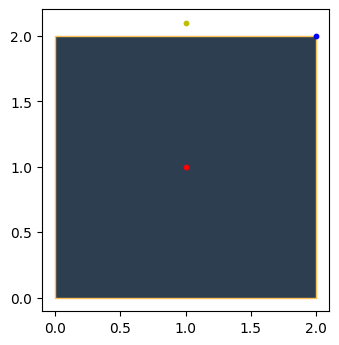

In [5]:
# Plotar o estado do Ceará
fig, ax = plt.subplots(dpi=100)

p.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)
ax.scatter(ponto1.x, ponto1.y, color='r', alpha=1, zorder=5, s=10)
ax.scatter(ponto2.x, ponto2.y, color='b', alpha=1, zorder=5, s=10)
ax.scatter(ponto3.x, ponto3.y, color='y', alpha=1, zorder=5, s=10)


Veja bem, temos 3 pontos: 1 vermelho, 1 azul e 1 amarelo. O Ponto vermelho está dentro, o azul está numa das pontas e o amarelo está fora do quadrado. Para facilitar a nossa vida podemos usar um dos módulos do `Polygon` para verificar se um ponto está contido nele:

In [6]:
print("""
Ponto 1: %s
Ponto 2: %s
Ponto 3: %s
""" %
      (quadrado.contains(ponto1),quadrado.contains(ponto2),quadrado.contains(ponto3))
)


Ponto 1: True
Ponto 2: False
Ponto 3: False



## Voltando pra hidrologia....

In [7]:
# GeoDataFrame com as shapes das bacias hidrográficas do Ceará
shapefile_bacias

,CODIGOBA0,DESCRICA1,IDENTIFI2,AREA3,HECTARES4,REGIONAL5,IMAGENS6,geometry
0,19,Coreaú,5,10627.71,684.95,Sobral,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"POLYGON ((-41.31321 -3.48891, -41.31548 -3.490..."
1,14,Curu,6,8621.85,752.37,Pentecoste,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"POLYGON ((-39.14407 -3.34335, -39.14375 -3.343..."
2,20,Litoral,7,8571.9,711.72,Pentecoste,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"POLYGON ((-40.11054 -2.82653, -40.10895 -2.826..."
3,15,Acaraú,1,14440.29,1108.58,Sobral,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"POLYGON ((-40.22779 -2.81084, -40.22729 -2.810..."
4,25,Alto Jaguaribe,2,25261.77,1285.37,Iguatu,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"POLYGON ((-40.84905 -6.12342, -40.85395 -6.113..."
5,16,Baixo Jaguaribe,3,7216.35,659.19,Limoeiro do Norte,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"MULTIPOLYGON (((-37.78713 -4.39935, -37.78628 ..."
6,23,Médio Jaguaribe,8,10320.23,765.52,Limoeiro do Norte,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"POLYGON ((-38.57465 -6.40358, -38.57471 -6.403..."
7,21,Metropolitana,9,15009.06,933.28,Fortaleza,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"MULTIPOLYGON (((-37.78720 -4.39943, -37.78732 ..."
8,18,Salgado,10,12739.0,828.22,Crato,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"POLYGON ((-38.76497 -6.91053, -38.76021 -6.914..."
9,17,Serra da Ibiapaba,11,5721.92,633.89,Crateús,<br>&nbsp;&nbsp;&nbsp;-&nbsp;<a href='http://a...,"POLYGON ((-41.13787 -4.98434, -41.13878 -4.984..."


In [8]:
# Estações Pluviométricas
pluviometric_stations.head()


,NomePostos,NumeroPostos,Lat,Long
0,ITAREMA,239001,-2.9167,-39.9167
1,CAMOCIM,240000,-2.9000,-40.8333
2,ACARAÚ,240001,-2.8833,-40.1167
3,CAMOCIM,240002,-2.9167,-40.8333
4,GURIU,240004,-2.8500,-40.5833


Com um GeoDataFrame podemos verificar em qual das bacias um dado ponto está contido

In [9]:
pluviometric_stations_ = pluviometric_stations.copy()
pluviometric_stations_.values[0]

array(['ITAREMA', 239001, -2.9167, -39.9167], dtype=object)

In [10]:
(nome_posto,ponto,lat,lon) = pluviometric_stations_.values[0]
shapefile_bacias.contains(Point([lon,lat]))


0     False
1     False
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

Uma forma de pegar o nome da bacia é usar esse vetor booleano pra retornar a linha verdadeira e selecionar a coluna `DESCRICA1`

In [11]:
shapefile_bacias[shapefile_bacias.contains(Point([lon,lat]))]["DESCRICA1"].values[0]

'Litoral'

Se um ponto não estiver dentro de nenhuma das shapes o código subirá uma mensagem de erro que quebraria o código:


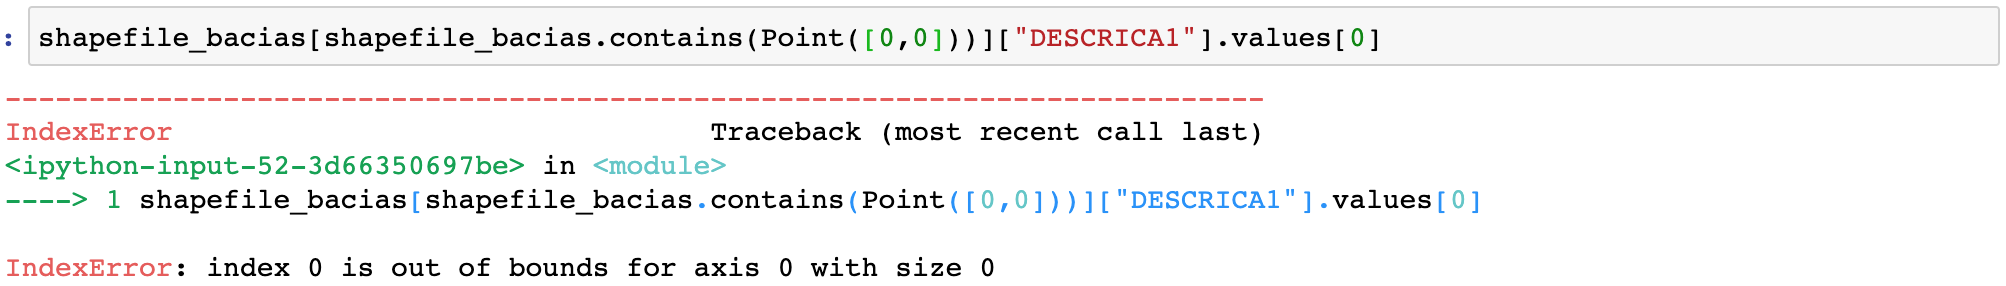

A alternativa é usar os operadores `try` e `except`

In [12]:
try:
    shapefile_bacias[shapefile_bacias.contains(Point([0,0]))]["DESCRICA1"].values[0]
except:
    print(0)

0


In [13]:
#pontos_e_bacias = {i: 0 for i in pluviometric_stations["Unnamed: 0"]}
pontos_e_bacias = []

# O Loop vai iterar por todo o DF pluviometric_stations_ pra ver em qual bacia cada ponto está
for (nome_posto,ponto,lat,lon) in tqdm(pluviometric_stations_.values):
    
    #Caso o ponto esteja contido numa das shapes, o nome da bacia será salva na lista pontos_e_bacias
    try:
        #pontos_e_bacias[ponto] = shapefile_bacias[shapefile_bacias.contains(Point([lon,lat]))]["DESCRICA1"].values[0]
        pontos_e_bacias.append(shapefile_bacias[shapefile_bacias.contains(Point([lon,lat]))]["DESCRICA1"].values[0])
    
    #Caso haja algum erro, ao invés do nome da bacia, será armazenado o número 0
    except:
        pontos_e_bacias.append(0)

100%|██████████| 1149/1149 [01:32<00:00, 12.40it/s]


In [14]:
# Verificação se o comprimento de pontos_e_bacias é igual ao de pluviometric_stations_
assert len(np.array(pontos_e_bacias)) == pluviometric_stations_.shape[0]

In [15]:
# Adição dos nomes das bacias ao DF pluviometric_stations
pluviometric_stations["Bacia"] = pontos_e_bacias

# Salvando o DF no formato .xlsx
pluviometric_stations.to_excel(os.path.join(data_path,pluviometric_data_path,"PLU_CE_Postos_Completo.xlsx"))
pluviometric_stations.head()

,NomePostos,NumeroPostos,Lat,Long,Bacia
0,ITAREMA,239001,-2.9167,-39.9167,Litoral
1,CAMOCIM,240000,-2.9000,-40.8333,Coreaú
2,ACARAÚ,240001,-2.8833,-40.1167,Acaraú
3,CAMOCIM,240002,-2.9167,-40.8333,Coreaú
4,GURIU,240004,-2.8500,-40.5833,Coreaú


In [16]:
# Caso queira verificar todos postos de uma bacia 
pluviometric_stations.query("Bacia=='Curu'")

,NomePostos,NumeroPostos,Lat,Long,Bacia
71,AÇUDE CAXITORÉ,339001,-3.7500,-39.3667,Curu
72,AÇUDE PENTECOSTE,339002,-3.7833,-39.2667,Curu
73,PENTECOSTE,339004,-3.7833,-39.2667,Curu
81,ITAPAGÉ,339014,-3.6833,-39.5833,Curu
85,IRAPUÃ,339019,-3.9167,-39.1333,Curu
...,...,...,...,...,...
510,SÍTIO FERNANDES,439081,-4.4053,-39.0692,Curu
513,JUREMA,439084,-4.1686,-39.4572,Curu
514,ASSENTAMENTO PAPEL,439085,-4.1967,-39.5614,Curu
515,BAIXA FRIA,439086,-4.5269,-39.3789,Curu


In [17]:
# Verificação de se houve algum erro na verificação dos pontos
pluviometric_stations.query("Bacia==0")

,NomePostos,NumeroPostos,Lat,Long,Bacia
14,JERICOACOARA,240014,-2.7833,-40.5167,0
39,ICARAÍ,338031,-3.6667,-38.6667,0
57,MONGUBA,338051,-3.5500,-38.6167,0
92,PARACURU,339026,-3.3833,-39.0833,0
145,PRAIA DA BALEIA,339082,-3.1500,-39.4333,0
312,PEIXE GORDO,437021,-4.7833,-37.2667,0
410,CAPONGA,438104,-4.0333,-38.1833,0
608,SÍTIO PAJEU,537050,-5.2247,-37.4547,0
886,OITICICA,541013,-5.0964,-41.0831,0
909,PEDRINHAS,638064,-6.3333,-38.5667,0


In [18]:
# GeoDataFrame das malhas d'água
shapefile_malha.query("TOPONIMIA!='0'").head()

,Length,TOPONIMIA,geometry
66,2.168228,Rch. Seco,"LINESTRING (-38.92835 -6.98958, -38.92881 -6.9..."
96,1.205039,Rch. da Jenipapeira,"LINESTRING (-38.99088 -6.92585, -38.99055 -6.9..."
98,2.945452,Rch. da Jenipapeira,"LINESTRING (-38.98071 -6.92729, -38.98042 -6.9..."
120,2.152671,Rch. Seco,"LINESTRING (-38.93805 -6.98453, -38.93829 -6.9..."
121,1.947809,Cor. do Tanque,"LINESTRING (-38.91402 -6.85292, -38.91413 -6.8..."


In [19]:
# Lista de Rios/Riachos de shapefile_malha
list_rch = shapefile_malha.TOPONIMIA.unique()
len(list_rch)

2626

In [20]:
pattern = "(?i)Curu"

# Procura qual dos rios/riachos apresentam o termo "Curu"
for i in range(len(list_rch)):
    if list_rch[i] != None:
        if re.findall(pattern,list_rch[i]) != []:
            break
    else:
        pass

In [21]:
# Salva as latitutudes e longitudes dos postos da bacia do Curu em 2 vetores x e y
x, y = pluviometric_stations.query("Bacia=='Curu'")["Long"].values, pluviometric_stations.query("Bacia=='Curu'")["Lat"].values



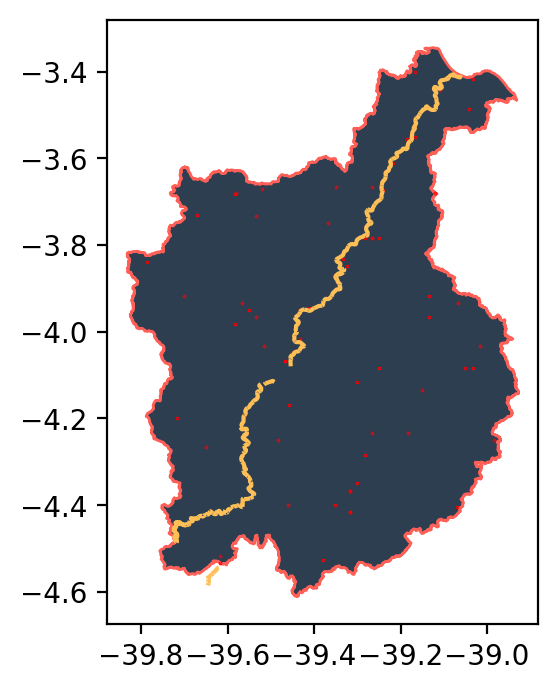

In [22]:
# Plot da Bacia
fig, ax = plt.subplots(dpi=200)
#state.plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)
shapefile_bacias.query("DESCRICA1=='Curu'").plot(facecolor="#2D3E50", edgecolor="#FE5F57", ax=ax)
shapefile_malha.query("TOPONIMIA=='%s'" % list_rch[i]).plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)
ax.scatter(x, y, color='r', alpha=1, zorder=1, s=0.1)


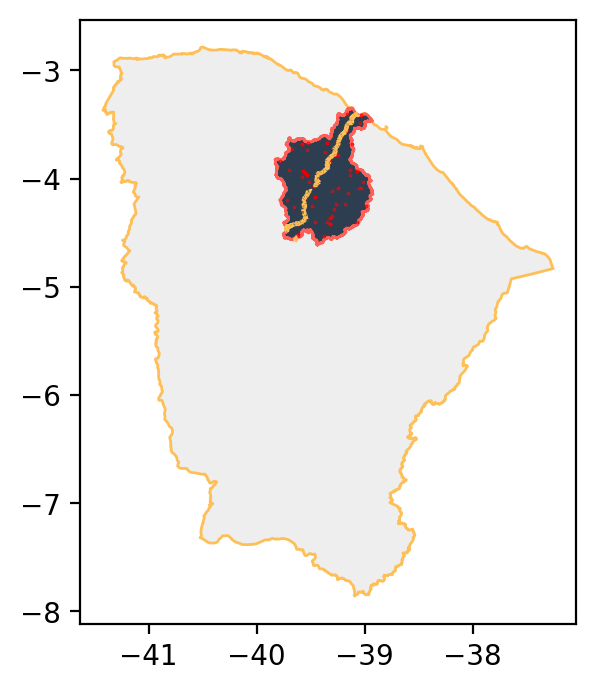

In [23]:
# Plotar da bacia na perspectiva do Estado
fig, ax = plt.subplots(dpi=200)
state.plot(facecolor="#eee", edgecolor="#FEBF57", ax=ax)
shapefile_bacias.query("DESCRICA1=='Curu'").plot(facecolor="#2D3E50", edgecolor="#FE5F57", ax=ax)
shapefile_malha.query("TOPONIMIA=='%s'" % list_rch[i]).plot(facecolor="#2D3E50", edgecolor="#FEBF57", ax=ax)
ax.scatter(x, y, color='r', alpha=1, zorder=1, s=0.1)
